<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module G: Section 21.4 and 21.5

Danika Young

# Simpson's Rule

Simpson’s Rule is a **numerical integration method** that provides a more **accurate approximation** than Riemann sums or the Trapezoidal Rule by using **parabolas** to approximate the function instead of straight-line segments.

Instead of approximating the function as **rectangles (Riemann sums)** or **trapezoids (Trapezoidal Rule)**, Simpson’s Rule fits **quadratic polynomials (parabolas)** through three points in each subinterval.


## **Mathematical Formula**
For a function $ f(x) $ over an interval $[a, b]$, we divide the interval into **an even number of subintervals** $( n $ must be even), each of width:

$
h = \frac{b-a}{n}
$

Simpson’s Rule approximation is given by:

$
I \approx \frac{h}{3} \left[ f(a) + 4 \sum f(x_{\text{odd}}) + 2 \sum f(x_{\text{even}}) + f(b) \right]
$

where:
- $ f(a) $ and $ f(b) $ are the function values at the endpoints.
- $ f(x_{\text{odd}}) $ are the function values at **odd indices** (multiplied by 4).
- $ f(x_{\text{even}}) $ are the function values at **even indices** (excluding the first and last, multiplied by 2).


## **Advantages of Simpson’s Rule**
* **More accurate** than Riemann sums and the Trapezoidal Rule.  
*  **Works well for smooth functions** (uses parabolas instead of lines).  
* **Error decreases faster** compared to other methods.  

## **Limitations of Simpson's Rule **  
- Requires \( n \) to be **even** for accurate results.  
- Not suitable for functions with high oscillations in small intervals.  
- More computationally intensive than simpler methods.


## **Comparison of Numerical Integration Methods**
| Method           | Formula | Approximation Shape | Accuracy |
|----------------|---------|----------------|----------|
| Left Riemann Sum | $ S_{\text{left}} = \sum f(x_i) \Delta x $ | Rectangles (Left) | Low |
| Right Riemann Sum | $ S_{\text{right}} = \sum f(x_i) \Delta x $ | Rectangles (Right) | Low |
| Midpoint Riemann | $ S_{\text{mid}} = \sum f(x_{\text{mid}}) \Delta x $ | Rectangles (Mid) | Medium |
| Trapezoidal Rule | $ \frac{h}{2} \left( f(a) + 2 \sum f(x_i) + f(b) \right) $ | Trapezoids | Medium-High |
| Simpson’s Rule | $ \frac{h}{3} \left[ f(a) + 4 \sum f(x_{\text{odd}}) + 2 \sum f(x_{\text{even}}) + f(b) \right] $ | Parabolas | High |



Simpson's Rule Approximation: 2.0001095173150043
Exact Integral: 2.0
Error: 0.00010951731500430384


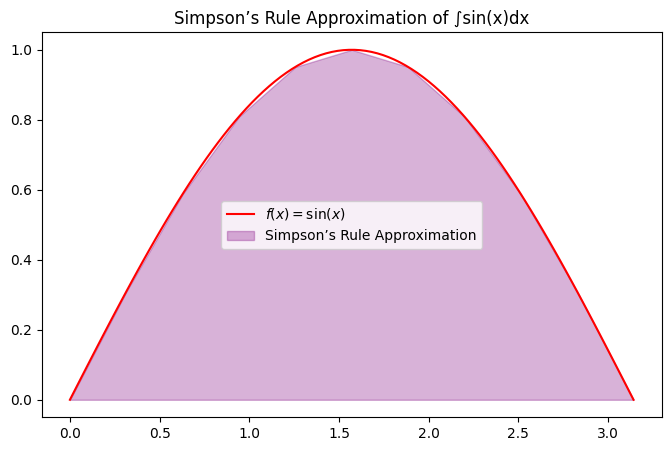

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)

# Simpson's Rule Implementation
def simpsons_rule(a, b, n):
    if n % 2 == 1:  # Simpson's rule requires an even number of intervals
        n += 1

    x = np.linspace(a, b, n+1)  # Partition points
    y = f(x)  # Function values at those points
    h = (b - a) / n  # Width of each interval

    # Compute Simpson's Rule
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return integral

# Define integration limits
a, b = 0, np.pi
n = 10  # Must be even

# Compute Simpson's Rule Approximation
simpson_integral = simpsons_rule(a, b, n)

# Exact integral for comparison
exact_integral = -np.cos(b) + np.cos(a)

# Print results
print(f"Simpson's Rule Approximation: {simpson_integral}")
print(f"Exact Integral: {exact_integral}")
print(f"Error: {abs(exact_integral - simpson_integral)}")

# Visualization of Simpson's Rule Approximation
x = np.linspace(a, b, 100)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r', label=r'$f(x) = \sin(x)$')

# Simpson's Rule Parabolas Visualization
x_simpson = np.linspace(a, b, n+1)
y_simpson = f(x_simpson)
plt.fill_between(x_simpson, y_simpson, alpha=0.3, color='purple', label="Simpson’s Rule Approximation")

plt.legend()
plt.title("Simpson’s Rule Approximation of ∫sin(x)dx")
plt.show()


Simpson's Rule Approximation: 30.0
Exact Integral: 30.000000000000007
Error: 7.105427357601002e-15


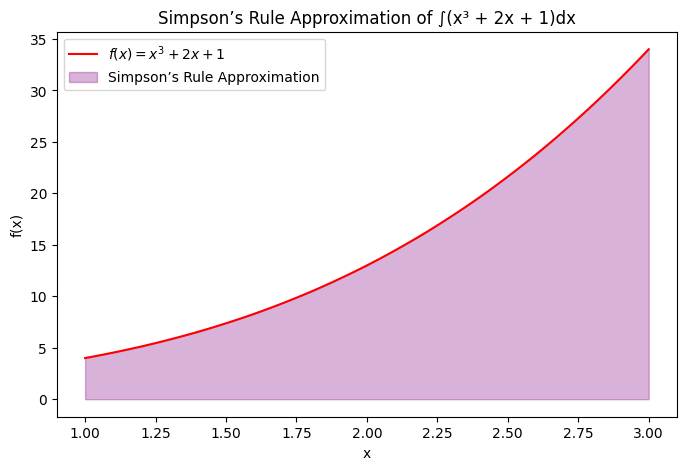

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad  # For exact integral comparison

# Define the function to integrate
def f(x):
    return x**3 + 2*x + 1  # Example function

# Simpson's Rule Implementation
def simpsons_rule(a, b, n):
    if n % 2 == 1:  # Ensure n is even for Simpson's rule
        n += 1

    x = np.linspace(a, b, n+1)  # Partition points
    y = f(x)  # Function values at those points
    h = (b - a) / n  # Width of each interval

    # Apply Simpson’s Rule formula
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[-1])
    return integral

# Integration limits
a, b = 1, 3
n = 10  # Must be even

# Compute Simpson's Rule Approximation
simpson_integral = simpsons_rule(a, b, n)

# Compute exact integral using SciPy
exact_integral, _ = quad(f, a, b)

# Print results
print(f"Simpson's Rule Approximation: {simpson_integral}")
print(f"Exact Integral: {exact_integral}")
print(f"Error: {abs(exact_integral - simpson_integral)}")

# Visualization of Simpson’s Rule Approximation
x = np.linspace(a, b, 100)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'r', label=r'$f(x) = x^3 + 2x + 1$')

# Simpson’s Rule Parabolas Visualization
x_simpson = np.linspace(a, b, n+1)
y_simpson = f(x_simpson)
plt.fill_between(x_simpson, y_simpson, alpha=0.3, color='purple', label="Simpson’s Rule Approximation")

plt.legend()
plt.title("Simpson’s Rule Approximation of ∫(x³ + 2x + 1)dx")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


# 📌 Summary of Simpson’s Rule

- **More accurate than Riemann sums and the Trapezoidal Rule**  
-  **Uses parabolas instead of straight-line approximations**  
-  **Works well for smooth functions**  

-  **Requires an even number of intervals**  
-  **More computationally intensive**  

**When should you use Simpson’s Rule?**
- If **higher accuracy** is needed with **smooth functions**.
- When **parabolic approximation** provides a better fit than straight-line methods.
- If the function is well-behaved and does not have sharp oscillations.

**When should you NOT use Simpson’s Rule?**
- If the function is highly **irregular or discontinuous**.
- If computational efficiency is a concern and a rough estimate is sufficient.
